<a href="https://colab.research.google.com/github/Darknight899/Lab2/blob/main/Lab2_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Predicting Student Performance from Demographic Factors

In [ ]:
## Abstract: We’ll examine the question: Do students' demographic features influence their grades? This lab report utilizes machine learning to investigate the predictive value of demographic factors, such as gender, age, and family income, in determining university students' final grades. After processing a dataset of 5,000 students, we are left with 3,975 after removing missing values. We compared three classification models: Decision Tree, K-Nearest Neighbors (KNN), and Logistic Regression. The most important factor was family income, which had a low prediction accuracy (21-22% across models). These results are moderately weak and indicate the necessity for perhaps more behavioral and academic features used in the model. Thus, demographic features by themselves are not enough to reliably predict a student's grade.

In [ ]:
## Introduction: A school department can apply a predictive model to evaluate its current student population and tailor the curriculum or needs based on the results from the model. If a model proves success, it can help boost student learning and success through changes made by the school, which are derived from the model

In [ ]:
## Related work: Current literature surrounding higher education institutions shows much debate on student retention and graduation levels. Therefore, institutions are more interested in student data than ever to help predict student success. Understanding student data and their learning performance could help institutions in assisting the student body towards academic success (Marbouti, 2021). The data set below is taking from kaggle.com, "Student Performance Analysis", a report written by Abdulqadir Mahmood.

In [ ]:
## Methodologies
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load data
df = pd.read_csv('Students_Grading_Dataset.csv')
df.head()

,Student_ID,First_Name,Last_Name,Email,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,...,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,S1000,Omar,Williams,student0@university.com,Female,22.0,Mathematics,97.36,40.61,59.61,...,62.84,83.49,C,10.3,Yes,No,Master's,Medium,1.0,5.9
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,S1001,Maria,Brown,student1@university.com,Male,18.0,Business,97.71,57.27,74.00,...,98.23,92.29,F,27.1,No,No,High School,Low,4.0,4.3
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
## Clean the data
# Drop any rows with missing values including "NaNs"
df = df.dropna()

In [ ]:
df.head(2)

,Student_ID,First_Name,Last_Name,Email,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,...,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
1,S1000,Omar,Williams,student0@university.com,Female,22.0,Mathematics,97.36,40.61,59.61,...,62.84,83.49,C,10.3,Yes,No,Master's,Medium,1.0,5.9
3,S1001,Maria,Brown,student1@university.com,Male,18.0,Business,97.71,57.27,74.00,...,98.23,92.29,F,27.1,No,No,High School,Low,4.0,4.3


In [ ]:
# Get visual of columns
print(df.columns)

Index(['Student_ID', 'First_Name', 'Last_Name', 'Email', 'Gender', 'Age',
       'Department', 'Attendance (%)', 'Midterm_Score', 'Final_Score',
       'Assignments_Avg', 'Quizzes_Avg', 'Participation_Score',
       'Projects_Score', 'Total_Score', 'Grade', 'Study_Hours_per_Week',
       'Extracurricular_Activities', 'Internet_Access_at_Home',
       'Parent_Education_Level', 'Family_Income_Level', 'Stress_Level (1-10)',
       'Sleep_Hours_per_Night'],
      dtype='object')


In [ ]:
# Only kept columns that refer to the student's demographics and grade
df = df.drop(['Student_ID', 'First_Name', 'Last_Name', 'Email',
       'Department', 'Study_Hours_per_Week',
       'Extracurricular_Activities', 'Internet_Access_at_Home',
       'Parent_Education_Level', 'Stress_Level (1-10)',
       'Sleep_Hours_per_Night', 'Attendance (%)', 'Midterm_Score', 'Final_Score',
       'Assignments_Avg', 'Quizzes_Avg', 'Participation_Score',
       'Projects_Score', 'Total_Score'], axis=1, errors='ignore')

In [ ]:
print(df.columns)

Index(['Gender', 'Age', 'Grade', 'Family_Income_Level'], dtype='object')


In [ ]:
df = df.rename(columns={'Family_Income_Level': 'Family_Income'})

In [ ]:
## Explore the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3975 entries, 1 to 9999
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Gender         3975 non-null   object 
 1   Age            3975 non-null   float64
 2   Grade          3975 non-null   object 
 3   Family_Income  3975 non-null   object 
dtypes: float64(1), object(3)
memory usage: 155.3+ KB


In [ ]:
# Shape & Types
print(df.shape)
print(df.dtypes)

(3975, 4)
Gender            object
Age              float64
Grade             object
Family_Income     object
dtype: object


In [ ]:
# No missing values
df.isnull().sum()

Gender           0
Age              0
Grade            0
Family_Income    0
dtype: int64

In [ ]:
# Visualize our target variable
print(df['Grade'].unique())

['C' 'F' 'A' 'D' 'B']


In [ ]:
# Convert categorical variables to numeric
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
df['Family_Income'] = df['Family_Income'].map({'Low': 0, 'Medium': 1, 'High': 2})
df['Grade'] = df['Grade'].map({'A': 4, 'B': 3, 'C': 2, 'D': 1, 'F': 0})
#(Rustam, 2015)

In [ ]:
# Summary statistics
print("\nSummary statistics:\n", df.describe())


Summary statistics:
             Gender          Age        Grade  Family_Income
count  3975.000000  3975.000000  3975.000000    3975.000000
mean      0.490063    21.052327     1.994214       0.987421
std       0.499964     1.993770     1.417845       0.813105
min       0.000000    18.000000     0.000000       0.000000
25%       0.000000    19.000000     1.000000       0.000000
50%       0.000000    21.000000     2.000000       1.000000
75%       1.000000    23.000000     3.000000       2.000000
max       1.000000    24.000000     4.000000       2.000000


In [ ]:
# Figure 1, Grade Distribution
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Grade')
plt.title('Distribution of Grades')
plt.show()
#(Mahmood, 2025)

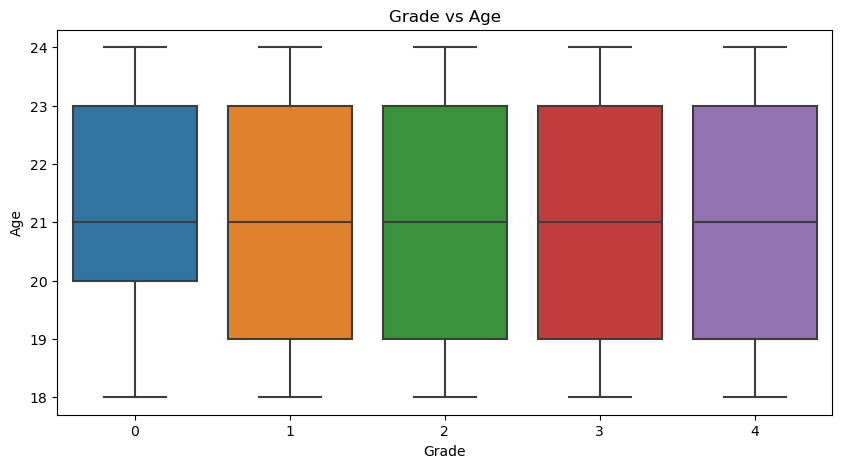

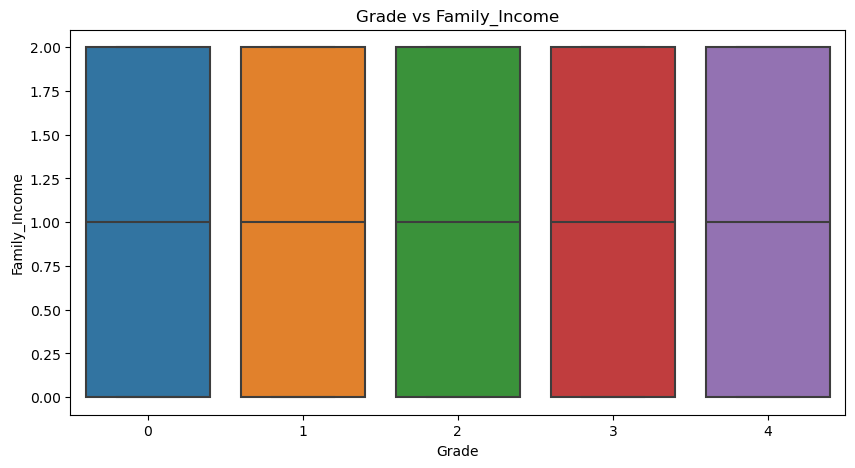

In [ ]:
# Figure 2 & 3, plot Grade with Age & Family_Income respectively
numeric_features = ['Age', 'Family_Income']
for feature in numeric_features:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=df, x='Grade', y=feature)
    plt.title(f'Grade vs {feature}')
    plt.show()
#(Pierson, 2024)

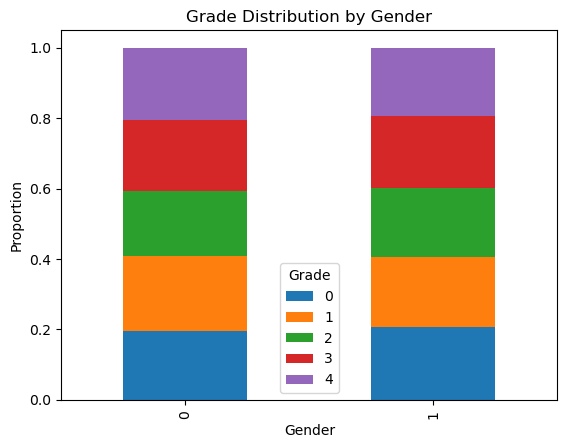

In [ ]:
# Figure 4, Grade distribution by Gender
pd.crosstab(df['Gender'], df['Grade'], normalize='index').plot(kind='bar', stacked=True)
plt.title('Grade Distribution by Gender')
plt.ylabel('Proportion')
plt.show()
#(Pandas-dev, 2025)

In [ ]:
## Model development
# Split data into features and target into test sets
X = df.drop('Grade', axis=1)
y = df['Grade']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, stratify=y, random_state=42)
# Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
#(Galarnyk, 2020)

In [ ]:
X_train.shape, X_test.shape

((1192, 3), (2783, 3))

In [ ]:
Classifier = DecisionTreeClassifier(random_state=1234)
model = Classifier.fit(X_train, y_train)
model.score(X_test, y_test)
#(Nwanganga, 2022)

0.2030183255479698

In [ ]:
print("Unique classes in model:", model.classes_)

Unique classes in model: [0 1 2 3 4]


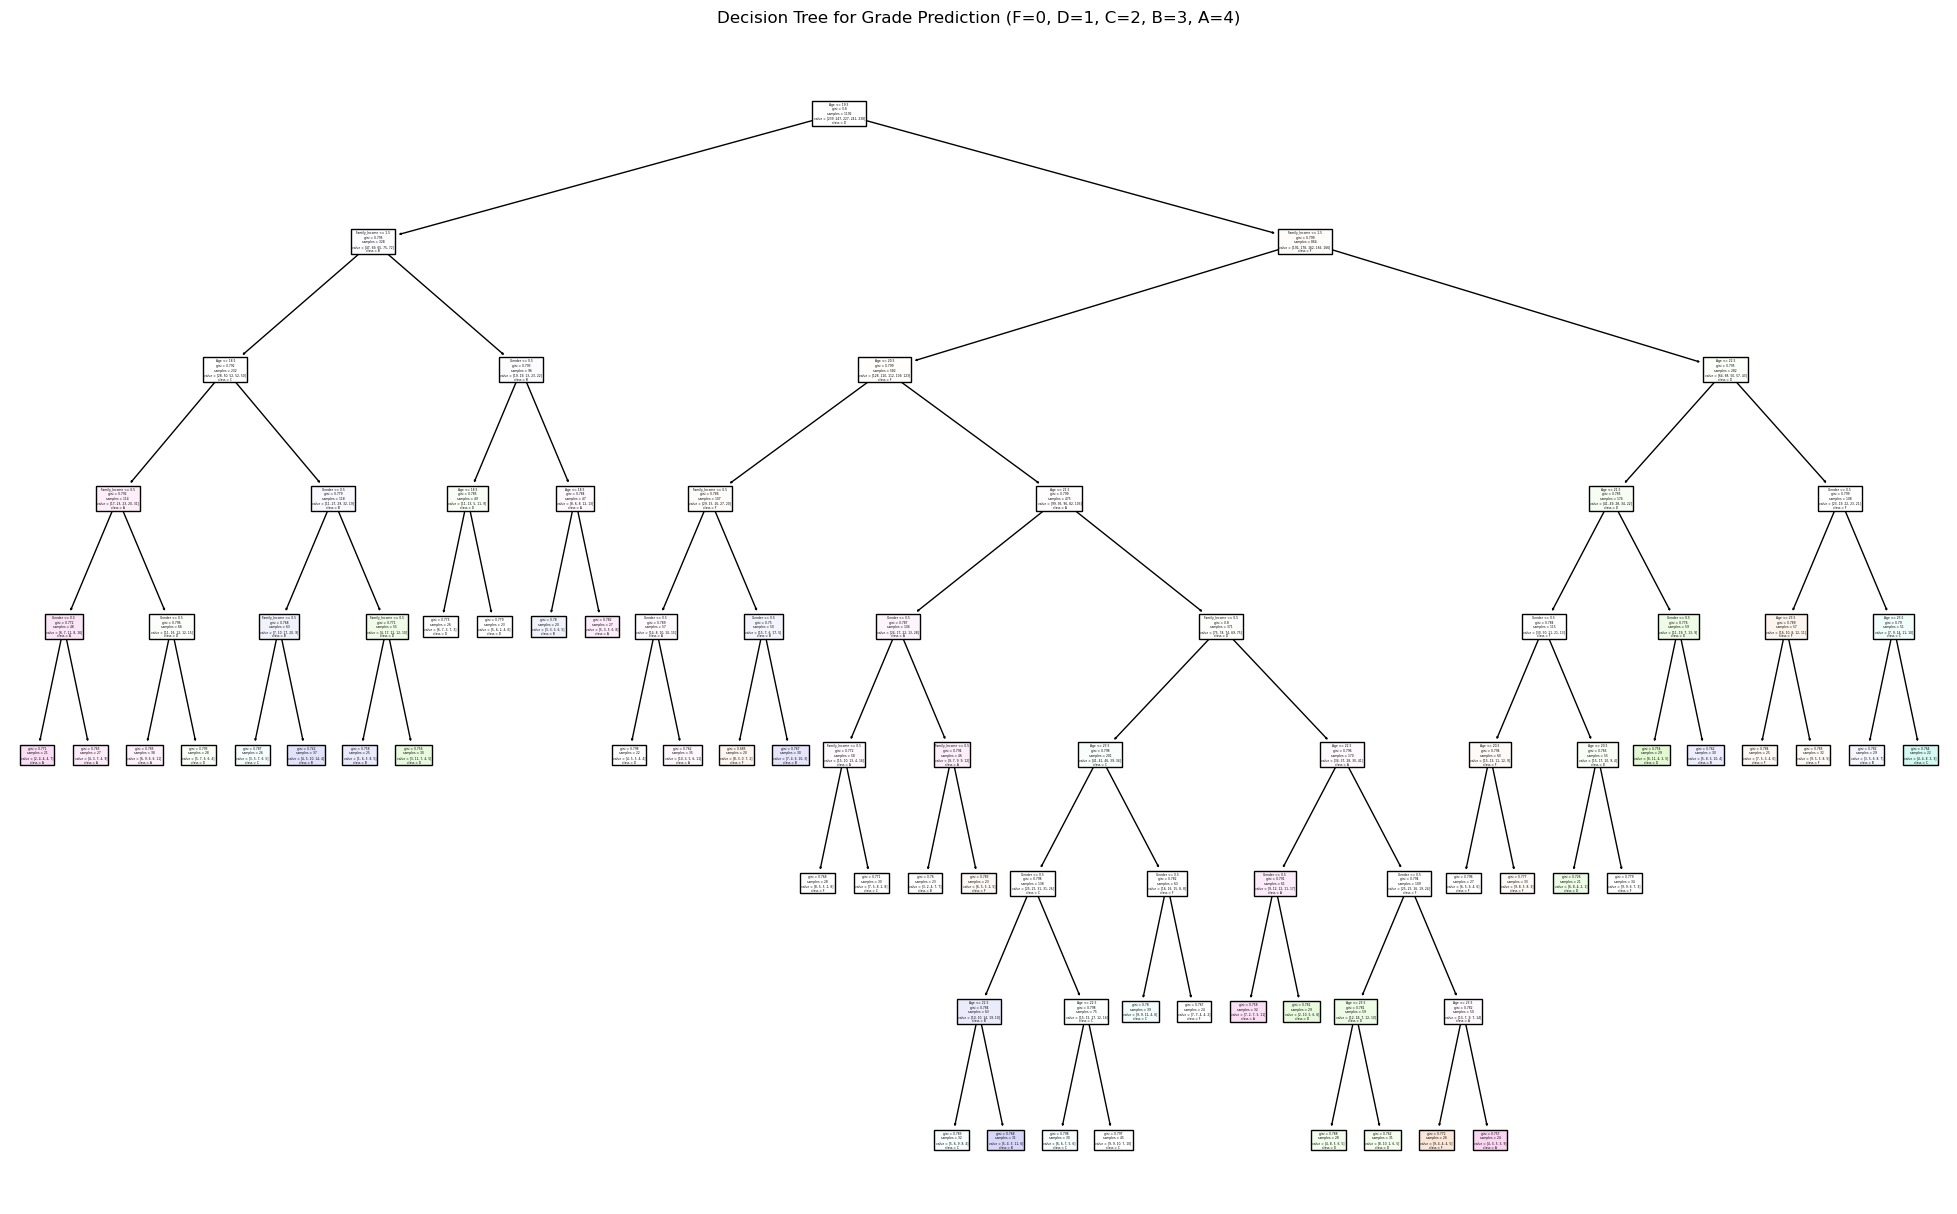

In [ ]:
from sklearn import tree
plt.figure(figsize = (25, 15))
grade_mapping = {0: 'F', 1: 'D', 2: 'C', 3: 'B', 4: 'A'}
tree.plot_tree(model, feature_names = list(X.columns), class_names=[grade_mapping[c] for c in model.classes_], filled = True);
plt.title("Decision Tree for Grade Prediction (F=0, D=1, C=2, B=3, A=4)", pad=20)
plt.show()
#(Nwanganga, 2022)

In [ ]:
print(classification_report(y_test, model.predict(X_test),
                          target_names=['F', 'D', 'C', 'B', 'A']))

              precision    recall  f1-score   support

           F       0.20      0.24      0.22       557
           D       0.20      0.23      0.22       577
           C       0.21      0.20      0.20       529
           B       0.20      0.18      0.19       564
           A       0.20      0.16      0.18       556

    accuracy                           0.20      2783
   macro avg       0.20      0.20      0.20      2783
weighted avg       0.20      0.20      0.20      2783



In [ ]:
# Prune Classification Tree
model.score(X_train, y_train)

0.3028523489932886

In [ ]:
model.score(X_test, y_test)

0.2030183255479698

In [ ]:
grid = {'max_depth':[2,3,4,5], 'min_samples_split':[2,3,4], 'min_samples_leaf':[1,2,3,4,5,6]}


In [ ]:
from sklearn.model_selection import GridSearchCV
Classifier = DecisionTreeClassifier(random_state=1234)
gcv = GridSearchCV(estimator =  Classifier , param_grid = grid )
gcv.fit(X_train, y_train)
#(Nwanganga, 2022)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=1234),
             param_grid={'max_depth': [2, 3, 4, 5],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6],
                         'min_samples_split': [2, 3, 4]})

In [ ]:
model_ = gcv.best_estimator_
model_.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=1234)

In [ ]:
model_.score(X_train, y_train)

0.2273489932885906

In [ ]:
model_.score(X_test, y_test)

0.20876751706791233

In [ ]:
# Our pruned classification tree model's accuracy increases by .003 for a poor 21% overall accuracy on the test data. While the training data decreases from roughly 30% to 23%.

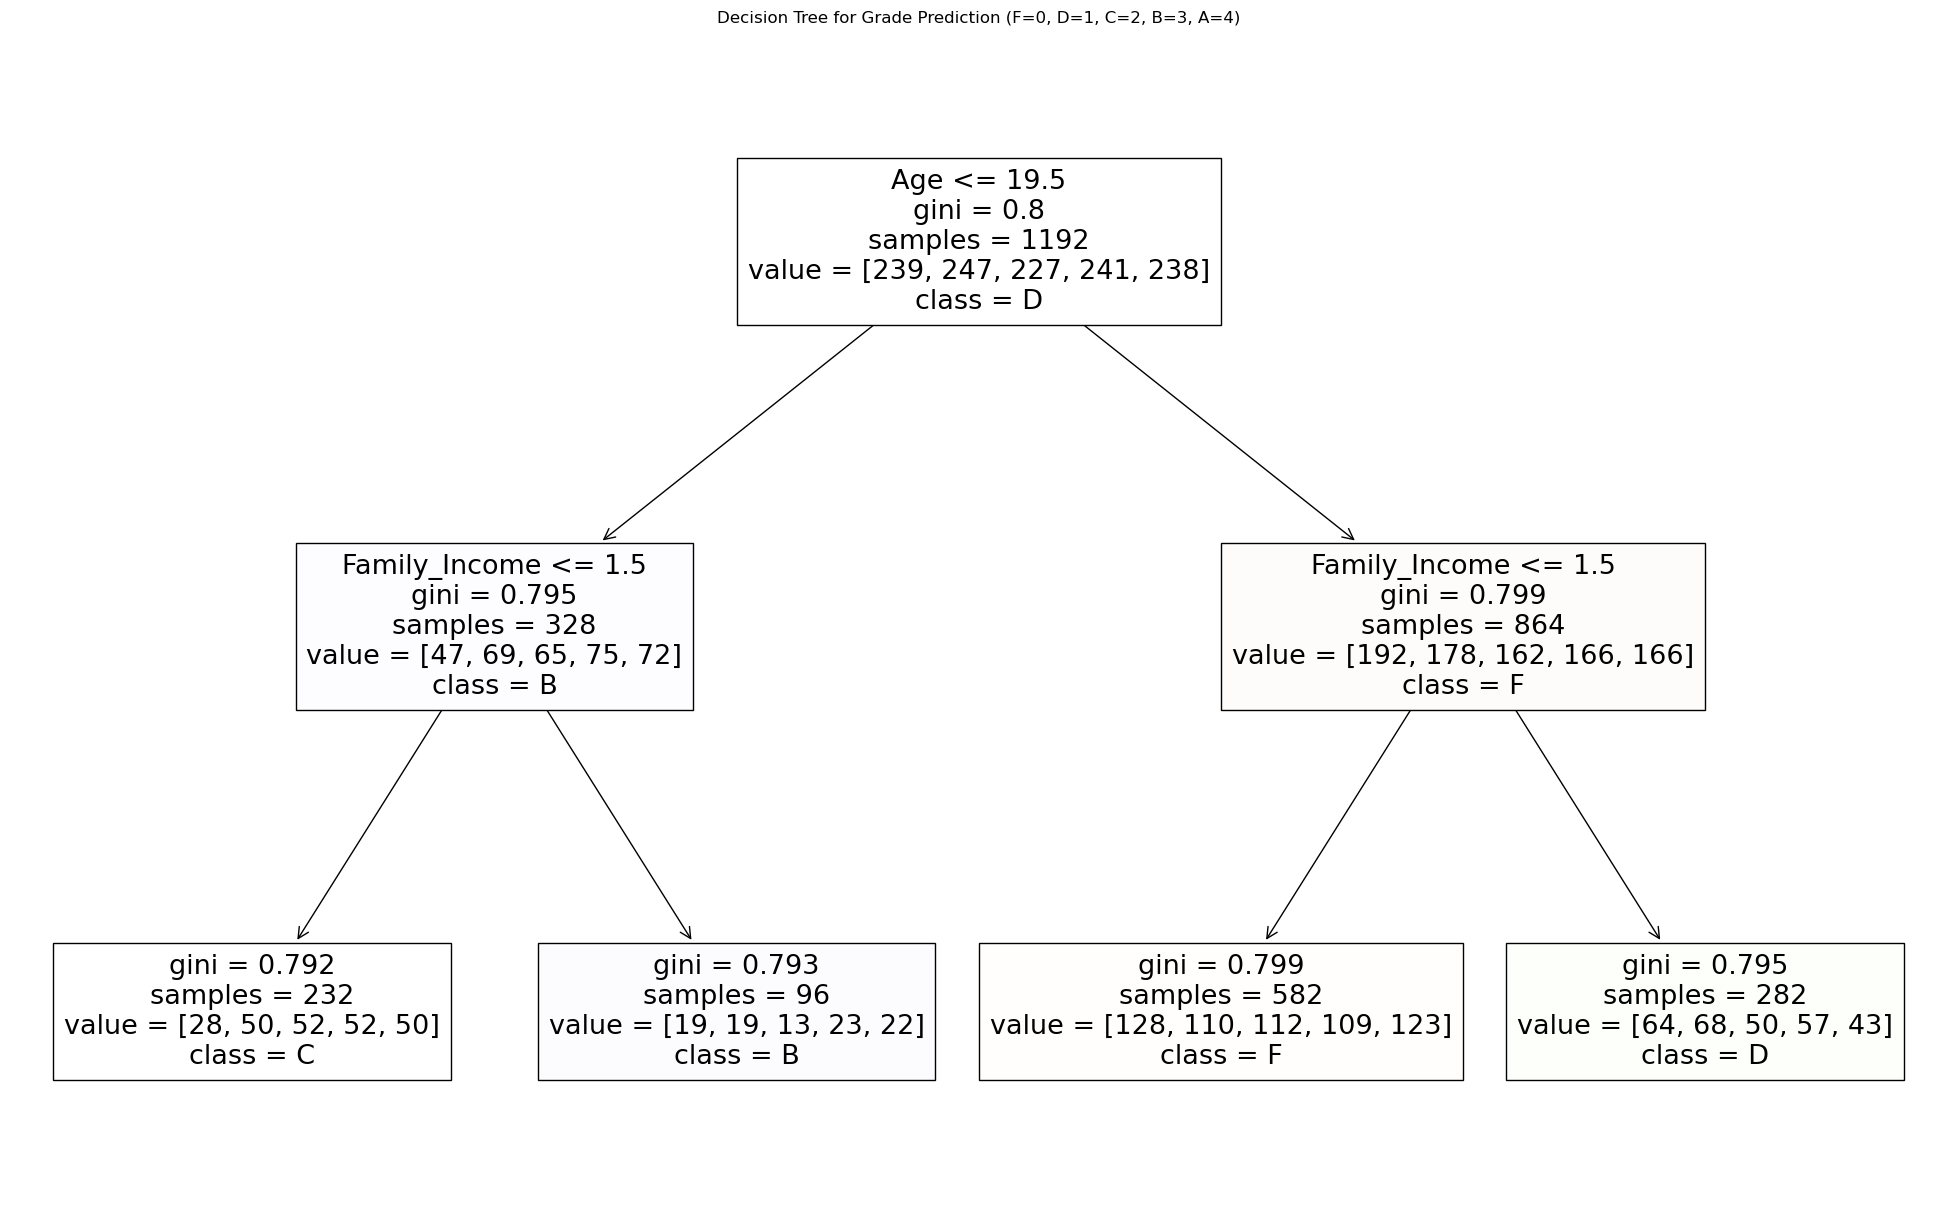

In [ ]:
plt.figure(figsize = (25, 15))
grade_mapping = {0: 'F', 1: 'D', 2: 'C', 3: 'B', 4: 'A'}
tree.plot_tree(model_, max_depth = 2, feature_names = list(X.columns), class_names=[grade_mapping[c] for c in model.classes_], filled = True);
plt.title("Decision Tree for Grade Prediction (F=0, D=1, C=2, B=3, A=4)", pad=20)
plt.show()
#(Nwanganga, 2022)

In [ ]:

print(f"Decision Tree Accuracy: {accuracy_dt:.2f}")
#(Itauma, 2019)
report = classification_report(y_test, y_pred_dt)
print(f"Classification Report:\n{report}")

Decision Tree Accuracy: 0.20
Classification Report:
              precision    recall  f1-score   support

           0       0.20      0.24      0.22       557
           1       0.20      0.23      0.22       577
           2       0.21      0.20      0.20       529
           3       0.20      0.18      0.19       564
           4       0.20      0.16      0.18       556

    accuracy                           0.20      2783
   macro avg       0.20      0.20      0.20      2783
weighted avg       0.20      0.20      0.20      2783



In [ ]:
#Logistic regression
X = df.drop('Grade', axis=1)
y = df['Grade']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, stratify=y, random_state=42)

In [ ]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
Classifier = LogisticRegression()
model = Classifier.fit(X_train, y_train)
model.predict(X_test)

array([3, 3, 0, ..., 4, 4, 2])

In [ ]:
model.score(X_test, y_test)

0.20337765001796623

In [ ]:
# The logistic regression model is only able to predict 20% of the labels in the test data set.

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, model.predict(X_test))

array([[149, 150,  46,  96, 116],
       [176, 138,  44, 100, 119],
       [140, 142,  43,  94, 110],
       [140, 158,  41, 109, 116],
       [148, 145,  28, 108, 127]])

In [ ]:
cm = confusion_matrix(y_test, model.predict(X_test))
class_accuracy = np.diag(cm) / np.sum(cm, axis=1)
print(dict(zip(['F','D','C','B','A'], class_accuracy.round(2))))
#(Overflow, 2019)

{'F': 0.27, 'D': 0.24, 'C': 0.08, 'B': 0.19, 'A': 0.23}


In [ ]:
#The model is able to predict on avg 23% of all grade level with the exception of C at 8% which is concerning.

In [ ]:
#Interpret the model
model.intercept_

array([-1.12160666, -0.29458731, -0.00364685,  0.72892921,  0.69091161])

In [ ]:
coef_ = pd.DataFrame(model.coef_, columns=X.columns, index=['F', 'D', 'C', 'B', 'A'])
print(coef_)

     Gender       Age  Family_Income
F -0.088593  0.051245       0.087219
D -0.005347  0.010247       0.120929
C  0.067290  0.002085      -0.125409
B  0.003908 -0.035756       0.037952
A  0.022742 -0.027820      -0.120692


In [ ]:
log_odds = np.round(model.coef_[4], 2)
log_odds
# We'll isolate Grade "A", row [4] as an example.

array([ 0.02, -0.03, -0.12])

In [ ]:
pd.DataFrame({'log odds': log_odds}, index=X.columns)

,log odds
Gender,0.02
Age,-0.03
Family_Income,-0.12


In [ ]:
#Log odds can be a bit confusing when trying to interpret the coefficients. Let's convert them to odds.

In [ ]:
odds = np.round(np.exp(log_odds), 2)
pd.DataFrame({'odds': odds}, index = X.columns)

,odds
Gender,1.02
Age,0.97
Family_Income,0.89


In [ ]:
# Gender doesn't significantly predict grade. An increase in Age of 1 year indicates a 3% lower chance of getting an A. Higher income is a decrease of 11% of getting an A, which is surprising.

In [ ]:

# Train the Logistic Regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Predict and evaluate
y_pred = logreg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy:.2f}")
#(Itauma, 2019)

report = classification_report(y_test, y_pred)
print(f"Classification Report:\n{report}")

Logistic Regression Accuracy: 0.20
Classification Report:
              precision    recall  f1-score   support

           0       0.20      0.27      0.23       557
           1       0.19      0.24      0.21       577
           2       0.21      0.08      0.12       529
           3       0.21      0.19      0.20       564
           4       0.22      0.23      0.22       556

    accuracy                           0.20      2783
   macro avg       0.21      0.20      0.20      2783
weighted avg       0.21      0.20      0.20      2783



In [ ]:
## K-Nearest Neighbor Model

In [ ]:
# Train the model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Predict and evaluate
y_pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

print(f"k-NN Accuracy: {accuracy_knn:.2f}")
#(Itauma, 2019)

k-NN Accuracy: 0.18


In [ ]:
from sklearn.metrics import classification_report
# Classification Report
report = classification_report(y_test, y_pred_knn)
print(f"Classification Report:\n{report}")


Classification Report:
              precision    recall  f1-score   support

           0       0.20      0.29      0.24       557
           1       0.17      0.19      0.18       577
           2       0.19      0.12      0.15       529
           3       0.18      0.25      0.21       564
           4       0.17      0.06      0.09       556

    accuracy                           0.18      2783
   macro avg       0.18      0.18      0.17      2783
weighted avg       0.18      0.18      0.17      2783



In [ ]:
# Comparison Table
evaluation = {'precision':[0.20,0.24, 0.20],
             'f1-score':[0.24, 0.22, 0.23],
             'recall':[0.29, 0.24, 0.27],
              'accuracy':[0.18, 0.20, 0.20]}
eval_df = pd.DataFrame(evaluation, columns=['precision', 'f1-score', 'recall', 'accuracy'], index=['KNN', 'Decision Tree', 'Logistic Regression'])
eval_df.columns.name = 'Model'
eval_df
#(Poola, 2020)
#Compared all results from Grade "F" or "0"

Model,precision,f1-score,recall,accuracy
KNN,0.20,0.24,0.29,0.18
Decision Tree,0.24,0.22,0.24,0.20
Logistic Regression,0.20,0.23,0.27,0.20


In [ ]:
## Conclusion: All 3 models prediction accuracy is weak at roughly 20%. This is a key indicator that demographics features are not enough to predict a students success. I should have implemented more independent variables into the models such as "Attendance%" and "Study Hours per Week". The K-Nearest Neighbor model performed the best in the f1-score, as a higher score indicates better performance. Is it also best at catching false negatives with 29% (Goyal, 2019). Whereas, The decision tree suffers the most false negatives with a recall of 24%. The logistic regression model is moderate across the board yet performs poorly in the grand scheme of things. We could most definitely improve all three models by potentially running confusion matrix but more importantly adding other student features as independent variables to help predict grades.

In [ ]:
## References
#Galarnyk, M. (2020, October 15). scikit-learn pipelines - Machine Learning with Scikit-Learn. LinkedIn. https://www.linkedin.com/learning/machine-learning-with-scikit-learn/scikit-learn-pipelines?leis=LTI13&resume=false&u=279222306
#Goyal, S. (2021, July 20). Evaluation Metrics for Classification Models. Analytics Vidhya. https://medium.com/analytics-vidhya/evaluation-metrics-for-classification-models-e2f0d8009d69
#How to show precision in a confusion matrix. (2019, May 10). Stack Overflow. https://stackoverflow.com/questions/56084882/how-to-show-precision-in-a-confusion-matrix
#Itauma, I. (2019). Machine Learning using Python - 3  Chapter 3: Supervised Learning - Classification. Quarto.pub. https://amightyo.quarto.pub/machine-learning-using-python/Chapter_3.html
#Mahmood, A. (2025, March 26). Students Performance Analysis. Kaggle.com; Kaggle. https://www.kaggle.com/code/abdulqadirmahmood/students-performance-analysis/input
#Marbouti, F., Ulas, J., & Wang , C.-H. (2021, August). Academic and Demographic Cluster Analysis of Engineering Student Success. Ieeexplore.ieee.org. https://ieeexplore.ieee.org/abstract/document/9298459
#Nwanganga, F. (2022, May 20). How to build a classification tree in Python - Machine Learning with Python: Decision Trees. LinkedIn. https://www.linkedin.com/learning/machine-learning-with-python-decision-trees/how-to-build-a-classification-tree-in-python?leis=LTI13&resume=false&u=279222306
#Nwanganga, F. (2022, November 9). How to build a logistic regression model in Python - Machine Learning with Python: Logistic Regression. LinkedIn. https://www.linkedin.com/learning/machine-learning-with-python-logistic-regression/how-to-build-a-logistic-regression-model-in-python?leis=LTI13&resume=false&u=279222306
#pandas-dev. (2025). pandas/pandas/core/reshape/pivot.py at v2.2.3 · pandas-dev/pandas. GitHub. https://github.com/pandas-dev/pandas/blob/v2.2.3/pandas/core/reshape/pivot.py#L578-L748
#Pierson, L. (2024, March 12). Creating statistical data graphics in Seaborn - Python for Data Science and Machine Learning Essential Training Part 1. LinkedIn. https://www.linkedin.com/learning/python-for-data-science-and-machine-learning-essential-training-part-1/creating-statistical-data-graphics-in-seaborn?leis=LTI13&resume=false&u=279222306
#Poola, H. (2020, July 5). KNN, Decision Tree, SVM, and Logistic Regression.ipynb. Gist. https://gist.github.com/hrishipoola/323d0459d9faeb466496d4e5ffbfb516
#Rustam, G. (2015, August 14). Convert categorical data in pandas dataframe. Stack Overflow. https://stackoverflow.com/questions/32011359/convert-categorical-data-in-pandas-dataframe

